In [1]:
#Python 3 notebook
import numpy as np
import pandas as pd
from functools import reduce
from math import floor, ceil


In [2]:
data = pd.read_csv('data.csv',header = 1, names =['date', 'prices', 'gold', 'compound', 'neg', 'neu', 'pos' ] )
data = data.set_index('date')
#Obtaining the past data in a different column
data['past_prices'] = data.loc[:,'prices'].shift(7)
data = data.iloc[7:data.shape[0]]
#Splitting train and test dataset
train_size = int(floor(0.8*data.shape[0]))
train_data = data.iloc[0:train_size]
test_data = data.iloc[train_size:]
print('Total data size: ',data.shape[0],'. Train data size: ', train_data.shape[0], '. Test data size: ', test_data.shape[0], '.')


('Total data size: ', 1175, '. Train data size: ', 940, '. Test data size: ', 235, '.')


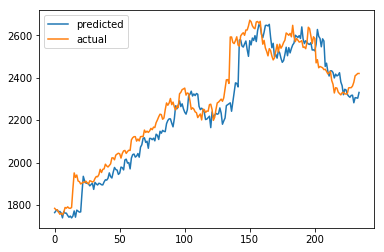

In [4]:
from  matplotlib.pyplot import plot, legend, show
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error
mlpc = SVR(C= 8.0,epsilon = 1.0, kernel ='linear')
mlpc.fit(train_data.loc[:,('past_prices','gold','compound','neg','neu', 'pos')].as_matrix(),train_data.loc[:,'prices'].as_matrix())
predicted = mlpc.predict(test_data.loc[:,('past_prices','gold','compound','neg','neu', 'pos')].as_matrix())
plot( range(0,test_data.shape[0]), predicted, range(0,test_data.shape[0]), test_data.loc[:,'prices'].as_matrix())
legend(['predicted','actual'])
show()

In [ ]:
#print mlpc.score(train_data.loc[:,('past_prices')].as_matrix().reshape(-1,1),train_data.loc[:,'prices'].as_matrix())

In [ ]:
print mlpc.score(train_data.loc[:,('past_prices','gold','compound','neg','neu', 'pos')].as_matrix(),train_data.loc[:,'prices'].as_matrix())

In [ ]:
from sklearn.metrics import mean_absolute_error
print mean_absolute_error(test_data.loc[:,'prices'].as_matrix(), predicted)